In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

In [2]:
NDQone = 'https://data.nasdaq.com/api/v3/datasets/wiki/'
Ticker1 = ['CVX', 'MRO', 'XOM', 'FCEL', 'PLUG', 'VLO']
Ticker2 = ['AMD', 'AMZN', 'AAPL', 'INTC', 'NVDA', 'MSFT']
Ticker3 = ['CVS', 'VRTX', 'BIIB', 'MOH', 'MRK', 'HUM']
Ticker4 = ['TGT', 'WMT', 'PG', 'KO', 'COST', 'HD']

TickerListList = [Ticker1, Ticker2, Ticker3, Ticker4]
TickerList = 'Ticker1', 'Ticker2', "Ticker3", 'Ticker4'

NDQthree = '.json?collapse=monthly&start_date=2005-01-01&end_date=2010-12-01&api_key='
APIKEY = '4xTnNzSoDevupJMaZ7wa'

#Creates our 4 sector Dataframes
EnergyDF = pd.DataFrame()
TechDF = pd.DataFrame()
HealthDF = pd.DataFrame()
ConsumerDF = pd.DataFrame()

#For each Sector...
for i in range(0, 4):
    #make lists that wipe in the next for loop
    dates = []
    opens = []
    closes = []
    stock = []
    
    #For each stock..
    for a in range(0, 6):   # 6 tickers per sector
        #Request the data
        response = requests.get(NDQone + TickerListList[i][a] + NDQthree + APIKEY)
        NDQ_json = response.json()
        
        #Try appending the data to the lists we need for the 4 Dataframes
        try:
            for x in range(0, 72):    #6 years of data
                dates.append(NDQ_json['dataset']['data'][x][0])
                opens.append(NDQ_json['dataset']['data'][x][1])
                closes.append(NDQ_json['dataset']['data'][x][4])
                stock.append(TickerListList[i][a])                 
                
        except: 
            print("API Data not found " + str(TickerListList[i][a]))
            pass
    
    #Add to the DataFrames depending on the outer 'Sector' For Loop
    if(i == 0):
        EnergyDF["Ticker"] = stock
        EnergyDF["Open Costs"] = opens
        EnergyDF["Closing Costs"] = closes
        EnergyDF["Date"] = dates
    if(i == 1):
        TechDF["Ticker"] = stock
        TechDF["Open Costs"] = opens
        TechDF["Closing Costs"] = closes
        TechDF["Date"] = dates
    if(i == 2):
        HealthDF["Ticker"] = stock
        HealthDF["Open Costs"] = opens
        HealthDF["Closing Costs"] = closes
        HealthDF["Date"] = dates
    if(i == 3):
        ConsumerDF["Ticker"] = stock
        ConsumerDF["Open Costs"] = opens
        ConsumerDF["Closing Costs"] = closes
        ConsumerDF["Date"] = dates

In [3]:
#a = Dataframe to split, b = individual ticker list, c = new DF
def DFReorg(a, b,c ):
    #Splits the DF into 6, per ticker
    Ticker1_df = a[a['Ticker'] == b[0]].reset_index()
    #Adds the tickers to the new DF
    c['Ticker1_Opening'] = Ticker1_df['Open Costs']
    #clears the tickerDF
    Ticker1_df = []
    Ticker2_df = a[a['Ticker'] == b[1]].reset_index()
    c['Ticker2_Opening'] = Ticker2_df['Open Costs']
    Ticker2_df = []
    Ticker3_df = a[a['Ticker'] == b[2]].reset_index()
    c['Ticker3_Opening'] = Ticker3_df['Open Costs']
    Ticker3_df = []
    Ticker4_df = a[a['Ticker'] == b[3]].reset_index()
    c['Ticker4_Opening'] = Ticker4_df['Open Costs']
    Ticker4_df = []
    Ticker5_df = a[a['Ticker'] == b[4]].reset_index()
    c['Ticker5_Opening'] = Ticker5_df['Open Costs']
    Ticker5_df = []
    Ticker6_df = a[a['Ticker'] == b[5]].reset_index()
    c['Ticker6_Opening'] = Ticker6_df['Open Costs']
    Ticker6_df = []
    
EnergynewDF = pd.DataFrame()
TechnewDF = pd.DataFrame()
HealthnewDF = pd.DataFrame()
ConsumernewDF = pd.DataFrame()

#used for referencing DFs in the def
DfList = ['EnergyDF', 'TechDF', 'HealthDF', 'ConsumerDF']
DFnewList = ['EnergynewDF', 'TechnewDF', 'HealthnewDF', 'ConsumernewDF']

#Renames Columns, makes legend a lot easier to make in the plot
#Sector_df.rename(columns = {'Ticker1_Opening': Ticker[0], 'Ticker2_Opening' : Ticker[1], 'Ticker3_Opening': Ticker[2], 'Ticker4_Opening' : Ticker[3],  'Ticker5_Opening': Ticker[4], 'Ticker6_Opening' : Ticker[5]}, inplace=True)



In [4]:
DFReorg(EnergyDF, Ticker1, EnergynewDF)
DFReorg(TechDF, Ticker2, TechnewDF)
DFReorg(HealthDF, Ticker3, HealthnewDF)
DFReorg(ConsumerDF, Ticker4, ConsumernewDF)



In [5]:
#Testing Reorg def
ConsumernewDF.head(5)


,Ticker1_Opening,Ticker2_Opening,Ticker3_Opening,Ticker4_Opening,Ticker5_Opening,Ticker6_Opening
0,57.60,54.42,61.57,63.94,68.21,30.60
1,55.98,53.76,61.51,62.95,66.59,30.06
2,52.16,54.04,63.23,61.15,62.61,31.09
3,53.72,53.53,60.32,58.86,64.87,31.88
4,50.65,50.51,59.31,55.20,55.86,27.63


In [6]:
#Old Code for single Stocks. Keeping for reuse later for Sector Comparisons.
def splot(a):
    plot1 = a.plot(figsize=(18, 10), lw = 3, fontsize = 18, xticks = [0, 12, 24, 36, 48, 60, 72])
    plot1.set_xlabel("Time in months", fontsize=20)
    plot1.set_ylabel("Stock Price in USD", fontsize=20)
    plot1.set_title('Stock Performance over Time', fontsize=20)
    plot1.set_facecolor('#e7e7e7')
    plot1.legend(fontsize=16)



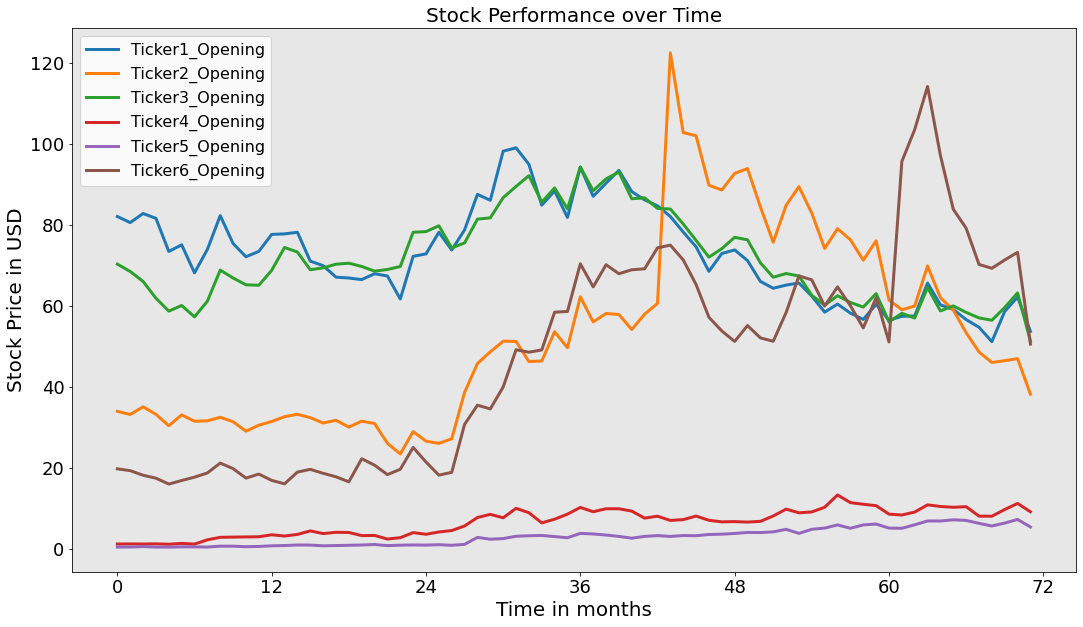

In [7]:
splot(EnergynewDF)

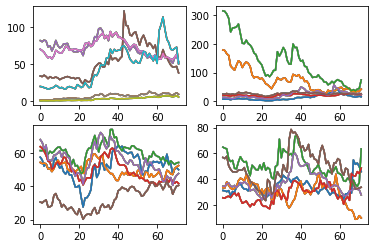

In [10]:
#Makes all the subplots
fig, ax = plt.subplots(2,2)
#Any index will do, its the X axis. 
index = EnergynewDF.reset_index()

x = 0
for _ in range(0, 4):
    x = x + 1
    if(x == 1):
        for a in range(0, 5):
            ax[0,0].plot(index['index'], EnergynewDF)
    if(x == 2):
        for b in range(0, 6):
            ax[0,1].plot(index['index'], TechnewDF)
    if(x == 3):
        for c in range(0, 6):
            ax[1,1].plot(index['index'], HealthnewDF)
    if(x == 4):
        for d in range(0, 6):
            ax[1,0].plot(index['index'], ConsumernewDF)    
        
plt.show()




In [ ]:
#Still need to Make the graphic look better!
#X/Y Labels
#Subtitles/Title!
#Figsize

#:) 

In [ ]:
#We also still need to do an aggregate sector to sector comparison.
#Something along the lines of Add all Open costs for a sector per row. 